In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data  = fetch_california_housing(as_frame=True)
df_housing = data.frame

## 📊 Mô tả các cột dữ liệu

| Tên cột              | Giải thích |
|----------------------|------------|
| **MedInc**           | **Thu nhập trung vị** của cư dân trong khu vực (tính theo đơn vị: chục nghìn USD). Ví dụ: `8.3252` tương đương với khoảng `$83,252`. |
| **HouseAge**         | **Tuổi trung bình của các căn nhà** trong khu vực (tính bằng năm). |
| **AveRooms**         | **Số phòng trung bình** mỗi hộ dân trong khu vực. |
| **AveBedrms**        | **Số phòng ngủ trung bình** mỗi hộ dân. |
| **Population**       | **Tổng dân số** trong khu vực. |
| **AveOccup**         | **Số người trung bình** sống trong một hộ. |
| **Latitude**         | **Vĩ độ** của khu vực (tọa độ địa lý). |
| **Longitude**        | **Kinh độ** của khu vực (tọa độ địa lý). |
| **MedHouseVal**      | **Giá trị nhà trung vị** trong khu vực (tính theo đơn vị: trăm nghìn USD). |

In [3]:
print("First 5 rows of the dataset:")
print(df_housing.head())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
print("\nDataset Info:")
df_housing.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


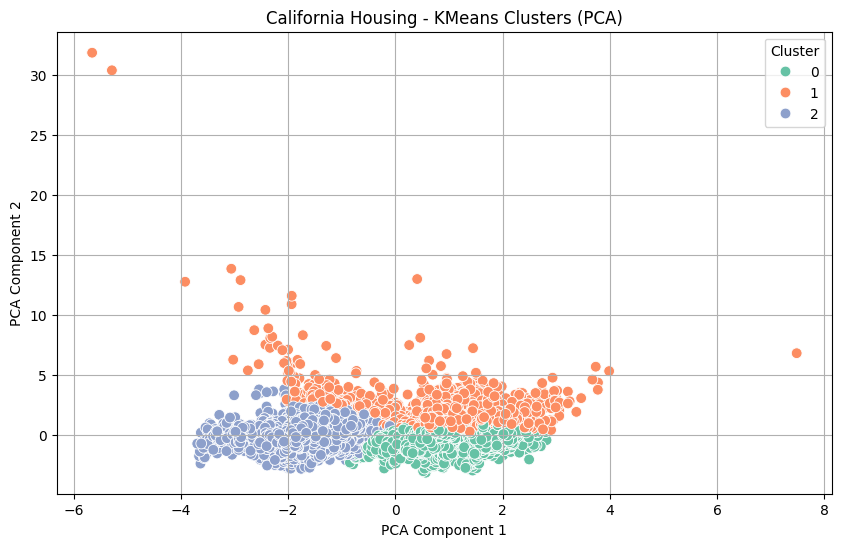

In [19]:
features = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Population"]
X = df_housing[features]

# 3. Scale dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_housing["cluster"] = kmeans.fit_predict(X_scaled)

# 5. Giảm chiều bằng PCA (2D) để trực quan
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_housing["pca1"] = X_pca[:, 0]
df_housing["pca2"] = X_pca[:, 1]

# 6. Vẽ scatter plot các cụm
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_housing, x="pca1", y="pca2", hue="cluster", palette="Set2", s=60)
plt.title("California Housing - KMeans Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()